# Задание 4

Подключаем библиотеки

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy import interpolate
%matplotlib inline

В качестве распределения для выполнения задания было выбрано распеределение Парето. https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9F%D0%B0%D1%80%D0%B5%D1%82%D0%BE

Зададим распределение с параметром k = 4,  сгенерируем с его помощью случайную выборку объёмом 1000. С помощью формул из Википедии вычислим для распеределения Парето математическое ожидание (mu) и дисперсию (sigma):

In [128]:
k = 4
pareto_rv = sts.pareto(k)
sample = pareto_rv.rvs(1000)
mu = k/(k - 1.)
sigma = ((1./(k-1))**2) * (k/(k-2.))

Построим график функции распределения:

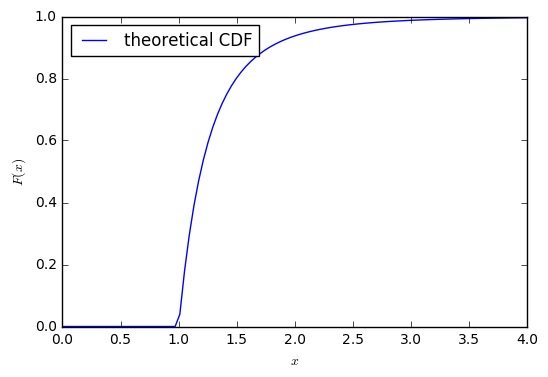

In [146]:
x = np.linspace(0.0,4,100)
cdf = pareto_rv.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')
plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')

Построим график функции плотности распределения и гистограмму выборки:

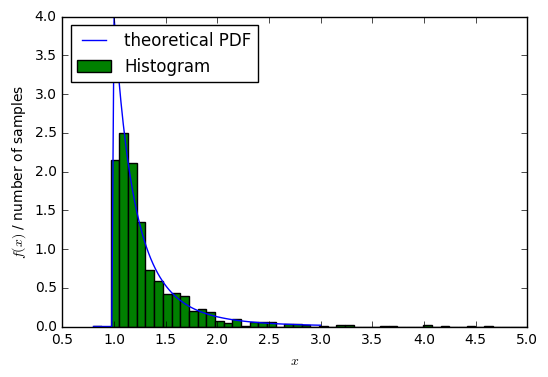

In [156]:
x = np.linspace(0.8,3,100)
pdf = pareto_rv.pdf(x)
plt.plot(x, pdf, label='theoretical PDF')
plt.hist(sample, bins=50, normed=True, label='Histogram', range=(0.8,5))
plt.ylabel('$f(x)$ / number of samples')
plt.xlabel('$x$')
plt.legend(loc='upper left')

Сгенерируем 1000 выборок с объёмом n=3 и вычислим средние значения в каждой из них:

In [144]:
Mean_sam_vol_three = np.array([])
for i in range(0,1000):
    Mean_sam_vol_three = np.append(Mean_sam_vol_three, np.array(np.mean(pareto_rv.rvs(3))))

Сгенерируем 1000 выборок с объёмом n=5 и вычислим средние значения в каждой из них:

In [143]:
Mean_sam_vol_five = np.array([])
for i in range(0,1000):
    Mean_sam_vol_five = np.append(Mean_sam_vol_five, np.array(np.mean(pareto_rv.rvs(5))))

Сгенерируем 1000 выборок с объёмом n=50 и вычислим средние значения в каждой из них:

In [142]:
Mean_sam_vol_fifty = np.array([])
for i in range(0,1000):
    Mean_sam_vol_fifty = np.append(Mean_sam_vol_fifty, np.array(np.mean(pareto_rv.rvs(50))))

Сгенерируем 1000 выборок с объёмом n=100 и вычислим средние значения в каждой из них:

In [141]:
Mean_sam_vol_hundred = np.array([])
for i in range(0,1000):
    Mean_sam_vol_hundred = np.append(Mean_sam_vol_hundred, np.array(np.mean(pareto_rv.rvs(100))))

Сгенерируем 1000 выборок с объёмом n=1000 и вычислим средние значения в каждой из них:

In [140]:
Mean_sam_vol_thousand = np.array([])
for i in range(0,1000):
    Mean_sam_vol_thousand = np.append(Mean_sam_vol_thousand, np.array(np.mean(pareto_rv.rvs(1000))))

Построим гистограммы выборочных средних и графики плотности соответствующих нормальных распределений:

Для n=3:

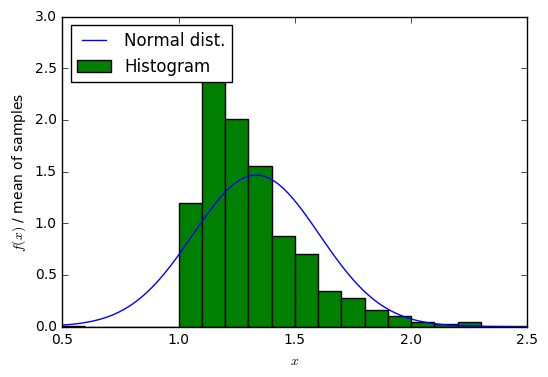

In [153]:
norm_rv = sts.norm(loc=mu, scale=(sigma/3.)**(0.5))
x = np.linspace(0.5,2.5,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='Normal dist.')
plt.hist(Mean_sam_vol_three, bins=20, normed=True, label='Histogram', range=(0.5, 2.5))
plt.ylabel('$f(x)$ / mean of samples')
plt.xlabel('$x$')
plt.legend(loc='upper left')

Для n=5:

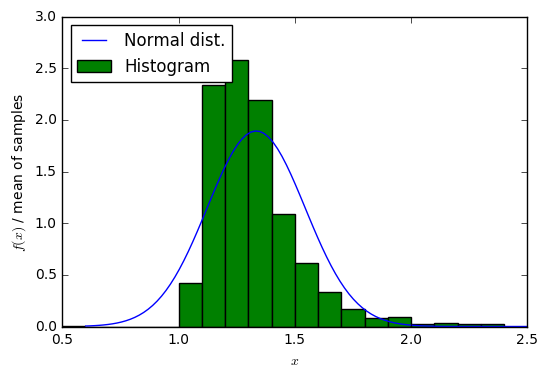

In [155]:
norm_rv = sts.norm(loc=mu, scale=(sigma/5.)**(0.5))
x = np.linspace(0.6,2.5,100)
pdf = norm_rv.pdf(x) 
plt.plot(x, pdf, label='Normal dist.')
plt.hist(Mean_sam_vol_five, bins=20, normed=True, label='Histogram', range=(0.5, 2.5))
plt.ylabel('$f(x)$ / mean of samples')
plt.xlabel('$x$')
plt.legend(loc='upper left')

Для n=50:

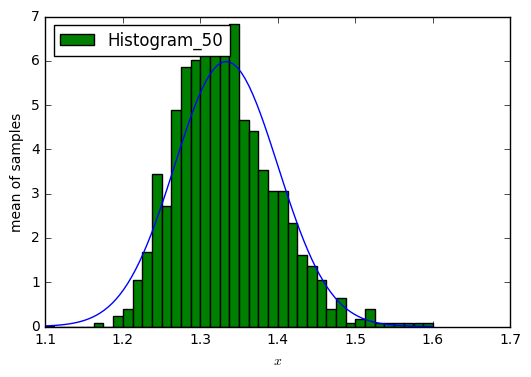

In [116]:
norm_rv = sts.norm(loc=mu, scale=(sigma/50.)**(0.5))
x = np.linspace(1.1,1.6,100)
pdf = norm_rv.pdf(x) 
plt.plot(x, pdf, label='Normal dist.')
plt.hist(Mean_sam_vol_fifty, bins=40, normed=True, label='Histogram_50', range=(1.1, 1.6))
plt.ylabel('$f(x)$ / mean of samples')
plt.xlabel('$x$')
plt.legend(loc='upper left')

Для n=100:

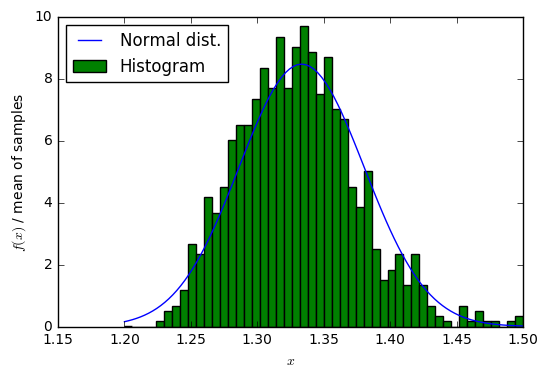

In [157]:
norm_rv = sts.norm(loc=mu, scale=(sigma/100.)**(0.5))
x = np.linspace(1.2,1.5,100)
pdf = norm_rv.pdf(x) 
plt.plot(x, pdf, label='Normal dist.')
plt.hist(Mean_sam_vol_hundred, bins=50, normed=True, label='Histogram', range=(1.2,1.5))
plt.ylabel('$f(x)$ / mean of samples')
plt.xlabel('$x$')
plt.legend(loc='upper left')

Для n=1000:

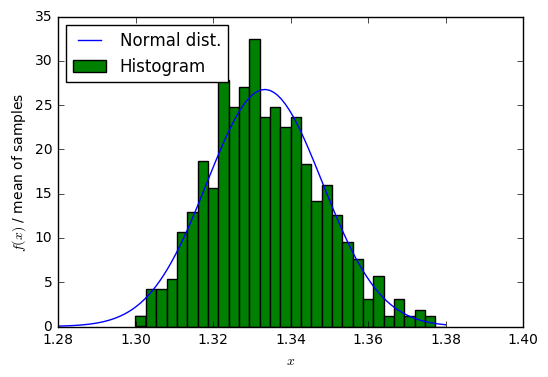

In [160]:
norm_rv = sts.norm(loc=mu, scale=(sigma/1000.)**(0.5))
x = np.linspace(1.28,1.38,100)
pdf = norm_rv.pdf(x) 
plt.plot(x, pdf, label='Normal dist.')
plt.hist(Mean_sam_vol_thousand, bins=30, normed=True, label='Histogram', range=(1.30,1.38))
plt.ylabel('$f(x)$ / mean of samples')
plt.xlabel('$x$')
plt.legend(loc='upper left')

Отдельно вычислим значения sigma и 3sigma для дальнейшего анализа

In [170]:
print 'n = 3, sigma =', (sigma/3.)**(0.5), ' 3*sigma =', 3*(sigma/3.)**(0.5) 
print 'n = 5, sigma =', (sigma/5.)**(0.5), ' 3*sigma =', 3*(sigma/5.)**(0.5)
print 'n = 50, sigma =', (sigma/50.)**(0.5), ' 3*sigma =', 3*(sigma/50.)**(0.5)
print 'n = 100, sigma =', (sigma/100.)**(0.5), ' 3*sigma =', 3*(sigma/100.)**(0.5)
print 'n = 1000, sigma =', (sigma/1000.)**(0.5), ' 3*sigma =', 3*(sigma/1000.)**(0.5)

n = 3, sigma = 0.272165526976  3*sigma = 0.816496580928
n = 5, sigma = 0.210818510678  3*sigma = 0.632455532034
n = 50, sigma = 0.0666666666667  3*sigma = 0.2
n = 100, sigma = 0.0471404520791  3*sigma = 0.141421356237
n = 1000, sigma = 0.01490711985  3*sigma = 0.04472135955


## Выводы

Центральная предельная теорема для распределения Парето работает, но требует достаточно большого объёма выборки (>=100), что связано с тем, что плотность распределения в данном случае сильно ассиметрична. По графикам получившихся нормальных распределений видно, как "колокол" постепенно сужается к нужному значению мат. ожидания. 
Это легко продемонстрировать с помощью критерия трёх сигм:


    n = 3,    3 x sigma = 0.817 


    n = 5,    3 x sigma = 0.632


    n = 50,   3 x sigma = 0.2


    n = 100,  3 x sigma = 0.141


    n = 1000, 3 x sigma = 0.044

Построим график зависимости трёх сигм от объёма выборки, чтобы продемонстрировать полученный вывод:

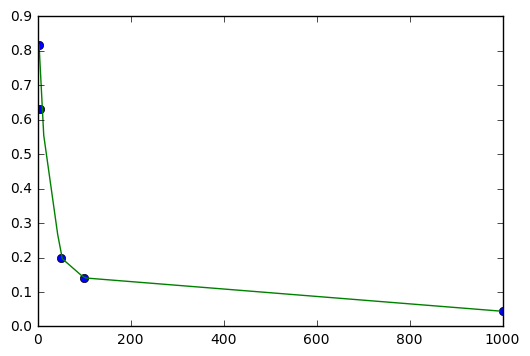

In [195]:
x = np.array([3, 5, 50, 100, 1000])
y = np.array([0.817, 0.632, 0.2, 0.141, 0.044])

f = interpolate.interp1d(x, y)
xnew = np.arange(3, 1000, 10)
ynew = f(xnew)

plt.plot(x, y, 'o', xnew, ynew, '-')

Хорошо видно, что в пределе зависимость должна прийти к нулю.